## pandas

In [ ]:
pip3 install pandas

In [3]:
import pandas as pd

s = pd.Series([1, 2., "klacek", True])
print(s[2:])

2    klacek
3      True
dtype: object


In [8]:
import numpy as np
df = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20210102'),
    'C' : pd.Series(1, index = list(range(1,5)), dtype='float32'),
    'D' : np.array([1,2,3,4], dtype='int32'),
    'E' : pd.Categorical(["A", "B", "A", "B"])
})
df["F"] = 'foo'
df

,A,B,C,D,E,F
1,1.0,2021-01-02,1.0,1,A,foo
2,1.0,2021-01-02,1.0,2,B,foo
3,1.0,2021-01-02,1.0,3,A,foo
4,1.0,2021-01-02,1.0,4,B,foo


,test1
count,50.00000
mean,7.43000
std,4.49831


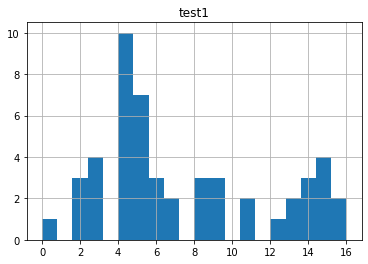

In [22]:
# CSV - comma separated values
test_results = pd.read_csv("test_results", header = None)
test_results.columns = ["test1"]

test_results.hist(bins = 20)
test_results.describe().iloc[:3]

In [29]:
import pandas as pd

df = pd.read_csv("nakazeni-vyleceni-umrti-testy.csv")

df.head()
# type(df["datum"][0])

,datum,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti,kumulativni_pocet_testu,kumulativni_pocet_ag_testu,prirustkovy_pocet_nakazenych,prirustkovy_pocet_vylecenych,prirustkovy_pocet_umrti,prirustkovy_pocet_provedenych_testu,prirustkovy_pocet_provedenych_ag_testu
0,2020-01-27,0,0,0,20,0,0,0,0,20,0
1,2020-01-28,0,0,0,28,0,0,0,0,8,0
2,2020-01-29,0,0,0,33,0,0,0,0,5,0
3,2020-01-30,0,0,0,34,0,0,0,0,1,0
4,2020-01-31,0,0,0,37,0,0,0,0,3,0


In [40]:
import pandas as pd
df = pd.read_csv("nakazeni-vyleceni-umrti-testy.csv")

df.set_index("datum", drop = True, inplace = True)
df.index = pd.to_datetime(df.index)

new_names = ["inf", "cur", "dead", "tests", "ag", "d_inf", "d_cur", "d_dead", "d_test", "d_ag"]
df.columns = new_names
# df.loc["2021-06-01":"2021-06-30"]
df["my_d_dead"] = df.diff()["dead"]
df.head()

,inf,cur,dead,tests,ag,d_inf,d_cur,d_dead,d_test,d_ag,my_d_dead
datum,,,,,,,,,,,
2020-01-27,0,0,0,20,0,0,0,0,20,0,NaN
2020-01-28,0,0,0,28,0,0,0,0,8,0,0.0
2020-01-29,0,0,0,33,0,0,0,0,5,0,0.0
2020-01-30,0,0,0,34,0,0,0,0,1,0,0.0
2020-01-31,0,0,0,37,0,0,0,0,3,0,0.0


<AxesSubplot:xlabel='datum'>

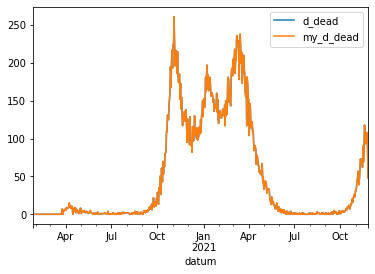

In [43]:
df[["d_dead", "my_d_dead"]].plot()

<AxesSubplot:xlabel='datum'>

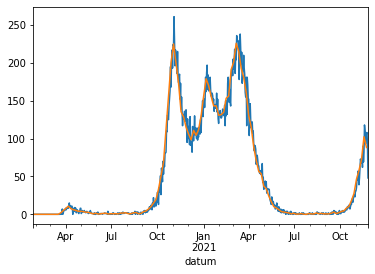

In [50]:
# df2 = df.resample("5D").sum()
df2 = df.resample("5D").agg(
    { "dead" : "mean", "d_dead" : "mean"}
)
df["d_dead"].plot()
df2["d_dead"].plot()

## matplotlib

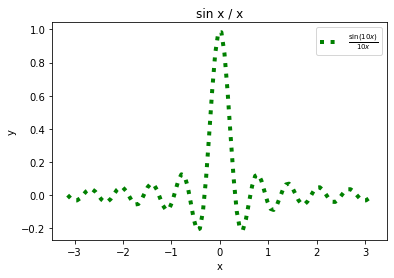

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100) # linspace(start, stop, count)
y = np.sin(10*x) / 10 / x

plt.plot(x, y, ":g", lw = 4.0, label = r"$\frac{\sin (10x)}{10x}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("sin x / x")
plt.legend()
plt.show()

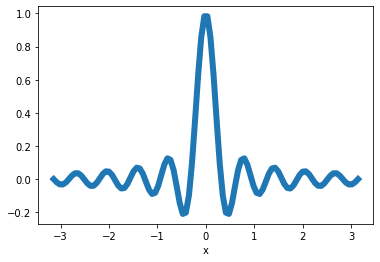

In [69]:
import matplotlib.pyplot as plt

fig = plt.Figure()

ax = plt.subplot()
ax.plot(x, y, lw = 6.0)
plt.xlabel("x")
plt.show()

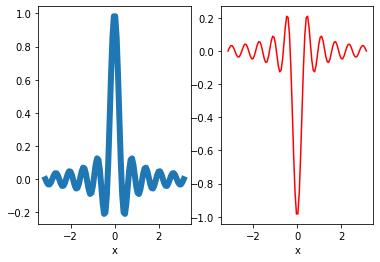

In [78]:
import matplotlib.pyplot as plt

size = (1200, 600)
dpi = 100
figsize = [s / dpi for s in size]

fig = plt.Figure(figsize = figsize)

ax = plt.subplot(121) # 1 radek, 2 sloupce, 1. pozice
ax.plot(x, y, lw = 6.0)
ax.set_xlabel("x")

ax = plt.subplot(122) # 1 radek, 2 sloupce, 2. pozice
ax.plot(x, -y, color="red")
plt.xlabel("x")
plt.savefig("graf.png", dpi = dpi)
plt.show()

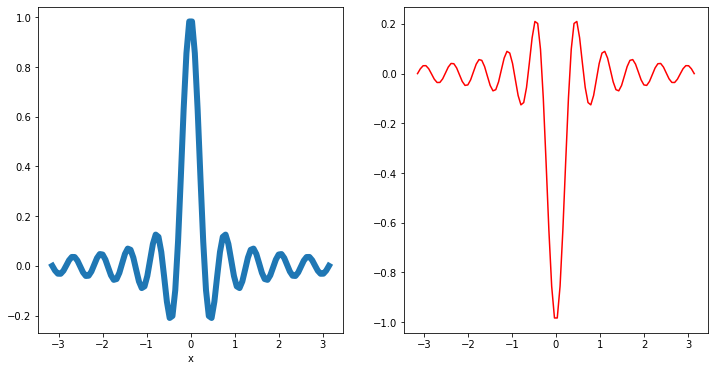

In [83]:
import matplotlib.pyplot as plt

size = (1200, 600)
dpi = 100
figsize = [s / dpi for s in size]

fig, axs = plt.subplots(1, 2, figsize = figsize)

axs[0].plot(x, y, lw = 6.0)
axs[0].set_xlabel("x")

axs[1].plot(x, -y, color="red")

plt.show()

## Scatterplot

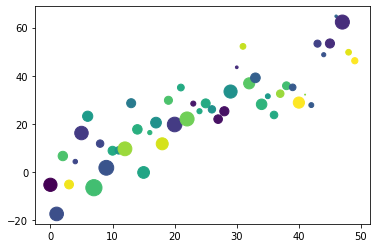

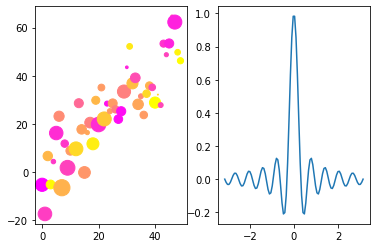

In [95]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'a' : np.arange(50), # podobne jako range, ale umi i float,
    'c' : np.random.randint(0, 50, 50),
    'd' : np.random.randn(50)
}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c = 'c', s = 'd', data = data)
plt.show()

cmap = plt.get_cmap("spring")

fig, axs = plt.subplots(1, 2)

axs[0].scatter('a', 'b', c = 'c', s = 'd', cmap = cmap, data = data)
axs[1].plot(x, y)

Text(0.5, 0, 'x')

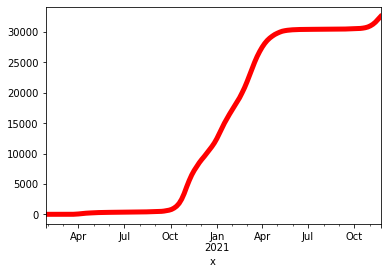

In [102]:
ax = df2["dead"].plot(lw = 5.0, color = "red")
ax.set_xlabel("x")

## ggplot

- gg ~ Grammar of graphics

```
data_k_vykresleni + prirazeni_os + geometricke_objekty + dalsi_objekty
```
- balik `plotnine`
- `pip3 install plotnine`

In [103]:
from plotnine.data import economics

data = economics
data

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


In [105]:
import pandas as pd
df = pd.read_csv("nakazeni-vyleceni-umrti-testy.csv")

df.set_index("datum", drop = True, inplace = True)
df.index = pd.to_datetime(df.index)

new_names = ["inf", "cur", "dead", "tests", "ag", "d_inf", "d_cur", "d_dead", "d_test", "d_ag"]
df.columns = new_names

/data/unicorn/uc-python/venv/dash/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


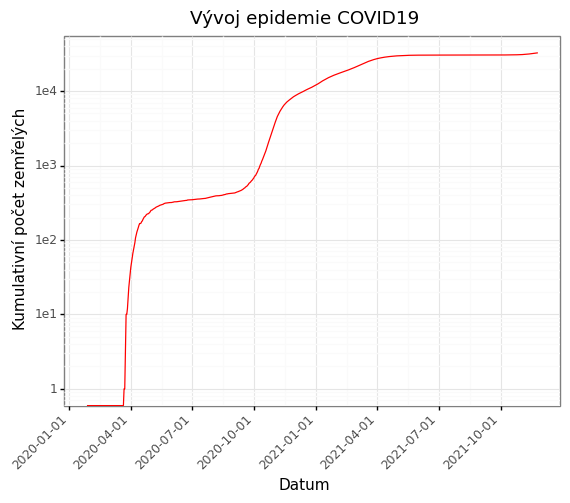

<ggplot: (8785901899593)>

In [141]:
from plotnine import *

p = (
    ggplot(df)
    + aes(x = df.index, y = "dead")
    + geom_line(color = "red")
    + labs(x = "Datum", y = "Kumulativní počet zemřelých", title = "Vývoj epidemie COVID19")
    + theme_bw()
    + theme(axis_text_x = element_text(angle = 45, hjust = 1))
)
p + scale_y_log10()

findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


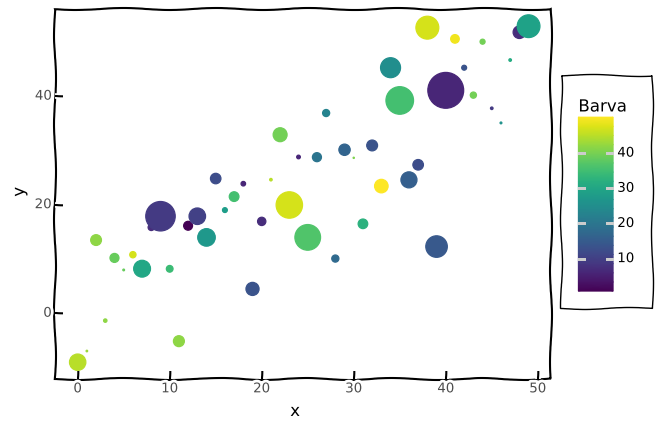

<ggplot: (8785901845209)>

In [135]:
import numpy as np

data = {
    'a' : np.arange(50), # podobne jako range, ale umi i float,
    'c' : np.random.randint(0, 50, 50),
    'd' : np.random.randn(50)
}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 5

p = (
    ggplot()
    + aes(x = data['a'], y = data['b'])
    + geom_point(size = data['d'], mapping = aes(color = data['c']))
    + labs(x = "x", y = "y", color = "Barva")
    + theme_xkcd()
)
p

## Plotly

```
pip3 install plotly
```

```
pip3 install dash
```
- vstupy pro plotly jsou ve formatu JSON = JavaScript Object Notation

In [146]:
# plotly express na zacatek

import numpy as np
import plotly.express as px

x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

fig = px.line(x = x, y = y, labels = {'x' : 'xlabel', 'y' : 'ylabel'}, title = "Graf")
fig.show()
print(fig)

Figure({
    'data': [{'hovertemplate': 'xlabel=%{x}<br>ylabel=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([0.        , 0.00628947, 0.01257895, ..., 6.27060636, 6.27689583,
                          6.28318531]),
              'xaxis': 'x',
              'y': array([ 0.00000000e+00,  6.28943332e-03,  1.25786178e-02, ..., -1.25786178e-02,
                          -6.28943332e-03, -2.44929360e-16]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Graf'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'xlabel'}},
               'yaxis': {'anchor': 'x', 'domain': [

In [147]:
import pandas as pd
df = pd.read_csv("nakazeni-vyleceni-umrti-testy.csv")

df.set_index("datum", drop = True, inplace = True)
df.index = pd.to_datetime(df.index)

new_names = ["inf", "cur", "dead", "tests", "ag", "d_inf", "d_cur", "d_dead", "d_test", "d_ag"]
df.columns = new_names

In [153]:
import plotly.express as px

fig = px.line(df,
              y = ["d_inf", "d_dead"],
              title = "Vývoj epidemie",
              labels = {"datum" : "Datum", "value" : "Pocet", "variable" : "pokus"},
              color_discrete_map = {"d_inf" : "green", "d_dead" : "orange"},
              template = "simple_white"
             )
fig.show()

In [157]:
import plotly.graph_objects as go

fig = go.Figure()
d_dead = go.Scatter(x = df.index, y = df["d_dead"], name = "Denní přírůstek zemřelých")
d_inf = go.Scatter(x = df.index, y = df["d_inf"], name = "Denní přírůstek infikovaných")
fig.add_trace(d_dead)
fig.add_trace(d_inf)
fig.update_layout(title = "Vývoj epidemie", template = "simple_white")
fig.show()

In [161]:
df2 = df.resample("2M").agg({"d_inf" : "sum", "d_dead" : "sum"})

fig = go.Figure()

d_inf = go.Bar(name = "infikovani", x = df2.index, y = df2["d_inf"])
d_dead = go.Bar(name = "zemreli", x = df2.index, y = df2["d_dead"])

fig.add_trace(d_inf)
fig.add_trace(d_dead)
fig.update_layout(barmode = "stack")
fig.show()

## Dekoratory (decorators)

- umoznuje rozsirovat opakovanym zpusobem funkce
- na vstupu funkci a vraci funkci. Obali funkci nejakym dalsim kodem
- dekorator muze zaviset i na dalsich.
- metaprogramovani

In [164]:
def add(x, y):
    return x+y

def wrapped_add(x, y):
    print("calling function add")
    return add(x,y)

wrapped_add(1, 2)

calling function add


3

In [167]:
def dec(func):
    def wrapper():
        print("calling function", func.__name__)
        return func()
    return wrapper

def f():
    print("ahoj")

wrapped_f = dec(f)
wrapped_f()

@dec
def g():
    print("hallo")
    
g()

calling function f
ahoj
calling function g
hallo


In [171]:
def dec(func):
    def wrapper(*args, **kwargs):
        print("calling function", func.__name__)
        return func(*args, **kwargs)
    return wrapper

@dec
def klobasa(x,y):
    return x + y

klobasa(1,2)

calling function klobasa


3

In [178]:
LOG_INFO = 0
LOG_WARNING = 1
LOG_DEBUG = 2

LOG_STR = ["INFO", "WARNING", "DEBUG"]

log_level = LOG_WARNING

def log(level = LOG_INFO):
    def dec(func):
        def wrapper(*args, **kwargs):
            if level <= log_level:
                print("{}: running function: {}".format(LOG_STR[level], func.__name__))
                if log_level >= LOG_DEBUG:
                    print("\targs:", args)
                    print("\tkwargs:", kwargs)
            return func(*args, **kwargs)

        return wrapper
    
    return dec

@log(LOG_WARNING)
def add(x, y):
    return x + y

add(1, 2)

3

## Dash

```
pip3 install dash jupyter-dash
```

Hodi se znat: HTML
- hypertext markup language

In [14]:
# jupyter verze
from jupyter_dash import JupyterDash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
# import dash.dash_html_components - deprecated
# import dash.dash_core_components - deprecated

pozdrav = {
    "cs" : "Nazdar",
    "de" : "Hallo",
    "en" : "Hello"
}

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Nazdar", id = "nadpis"),
    dcc.RadioItems(id = "jazyk",
                    options = [
                        {"value" : "cs", "label" : "Česky"},
                        {"value" : "en", "label" : "English"},
                        {"value" : "de", "label" : "Deutsch"}
                    ],
                   value = "cs"
                 )
])

@app.callback(
    Output("nadpis", "children"),
    Input("jazyk", "value"))
def update_hello(val):
    return pozdrav[val]

app.run_server(mode = "inline", debug = True)

In [ ]:
# plain verze
from dash import Dash
from dash import html
# import dash.dash_html_components - deprecated

app = Dash(__name__)

app.layout = html.Div([html.H2("Ahoj")]) # <div><h1>Ahoj</h1></div>

# app.run_server()

In [16]:
from jupyter_dash import JupyterDash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

import plotly.graph_objects as go

import pandas as pd

# DATA PREPROCESSING ===================================
df = pd.read_csv("nakazeni-vyleceni-umrti-testy.csv")

df.set_index("datum", drop = True, inplace = True)
df.index = pd.to_datetime(df.index)

new_names = ["inf", "cur", "dead", "tests", "ag", "d_inf", "d_cur", "d_dead", "d_test", "d_ag"]
df.columns = new_names

pretty_names = {
    "inf" : "Nakažení celkem",
    "dead" : "Mrtví celkem",
    "d_inf" : "Přírůstek nakažených",
    "d_dead" : "Přírůstek mrtvých"
}

aggr = {"inf" : "sum", "dead" : "sum",  "d_inf" : "mean", "d_dead" : "mean" }
# ======================================================


app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Covid"),
    html.Label([
        "Theme",
        dcc.Dropdown(
            id = "theme", clearable = False,
            value = "plotly_white",
            options = [{'label' : c, 'value' : c} for c in ["plotly_white", "plotly_dark"]]
        ),
        dcc.Checklist(
            id = "checklist-id",
            value = ["d_inf", "d_dead"],
            options = [{'label' : pretty_names[c], 'value' : c} for c in ["d_inf", "d_dead"]]
        )
    ]),
    dcc.Graph(id="graph")
])

@app.callback(
    Output("graph", "figure"),
    Input("theme", "value"),
    Input("checklist-id", "value"))
def update_figure(theme, checklist_value):
    print(checklist_value)
    fig = go.Figure()
    for dt in checklist_value:
        fig.add_trace(go.Scatter(x = df.index, y = df[dt], name = pretty_names[dt]))
    fig.update_layout(template = theme)
    
    return fig


app.run_server(mode = "inline")

['d_inf', 'd_dead']
